In [1]:
# !pip install -q -U ucimlrepo scikit-learn xgboost mlxtend

# скачаем дополнительные файлы необходимые для скрипта
# !wget https://gist.github.com/Kemsekov/ac500f53026b2bbed7699732b4f07b55/raw -O pandas_dataframe_series_encoding.py 
# !wget https://gist.github.com/Kemsekov/ff73d15994598217ef23921b10092a07/raw -O cross_val_classification_report.py
# !wget https://gist.github.com/Kemsekov/19bd3c04757e646e3a1c19d6694e16eb/raw -O render_3d.py

In [2]:
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("whenamancodes/students-performance-in-exams")

print("Path to dataset files:", path)
!ls {path}
data = pd.read_csv(path+"/exams.csv")
label_name = 'gender'
X = data[[c for c in data.columns if c!=label_name]]
y = data[label_name]
data

/home/vlad/Programs/Programs/Git/ML_LAB/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/vlad/.cache/kagglehub/datasets/whenamancodes/students-performance-in-exams/versions/1
exams.csv


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82


In [3]:
# import pandas as pd
# from ucimlrepo import fetch_ucirepo 
  

# dataset_id = 3
# # dataset_id = 193
# # dataset_id = 75

# # Загрузим датасет 
# annealing = fetch_ucirepo(id=dataset_id) 
  
# # выгрузим датасет в pandas
# X : pd.DataFrame = annealing.data.features 
# y = annealing.data.targets 
  
# # метадата 
# print(annealing.metadata) 
  
# # информация о переменных
# print(annealing.variables) 

In [4]:
# ифнормация о полях показывает что требуется нормализация данных
X.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [5]:
# так же некоторые данные требуют замены строковых признаков на числовые
X.head(10)

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,group A,high school,standard,completed,67,67,63
1,group D,some high school,free/reduced,none,40,59,55
2,group E,some college,free/reduced,none,59,60,50
3,group B,high school,standard,none,77,78,68
4,group E,associate's degree,standard,completed,78,73,68
5,group D,high school,standard,none,63,77,76
6,group A,bachelor's degree,standard,none,62,59,63
7,group E,some college,standard,completed,93,88,84
8,group D,high school,standard,none,63,56,65
9,group C,some college,free/reduced,none,47,42,45


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   race/ethnicity               1000 non-null   object
 1   parental level of education  1000 non-null   object
 2   lunch                        1000 non-null   object
 3   test preparation course      1000 non-null   object
 4   math score                   1000 non-null   int64 
 5   reading score                1000 non-null   int64 
 6   writing score                1000 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 54.8+ KB


In [7]:
import pandas as pd
#выведем сколько у нас имеется отсутствующих признаков
print("Count of missing values")
missing_count : pd.Series = X.isna().mean().sort_values(ascending=False)
missing_count

Count of missing values


race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64

In [8]:
# какие у нас классы и как они распределены?
# выведем кол-во классов и видим что выборка очень несбалансирована
print("counts:")
y.value_counts()
# т.к классы несбалансированны, то при обучении нужно будет разделять выборки балансированно, и(или) удалить классы, и(или) 
# сделать oversampling

counts:


gender
male      517
female    483
Name: count, dtype: int64

In [9]:
#Удалим признаки с 20%+ отсутствующими значениями
to_remove = missing_count[missing_count>0.2]
X_cleaned = X.drop(columns=to_remove.axes[0])
X_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   race/ethnicity               1000 non-null   object
 1   parental level of education  1000 non-null   object
 2   lunch                        1000 non-null   object
 3   test preparation course      1000 non-null   object
 4   math score                   1000 non-null   int64 
 5   reading score                1000 non-null   int64 
 6   writing score                1000 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 54.8+ KB


In [10]:
# когда мы удалили ненужные признаки, заменяем строки на числа.
# Используем уже готовое решение чтоб строковые признаки на их соответствующии категории
from pandas_dataframe_series_encoding import one_hot_encode, label_encode, mixed_encoder

non_class_columns = X_cleaned.columns
classes,mapping = label_encode(y)
X_encoded = mixed_encoder(X_cleaned[non_class_columns])[0]
X_encoded.head(10)

,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch,test preparation course,math score,reading score,writing score
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,67,67,63
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,40,59,55
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,59,60,50
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,77,78,68
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,78,73,68
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,63,77,76
6,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,62,59,63
7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,93,88,84
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,63,56,65
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,47,42,45


In [33]:
# Делаем нормализацию данных используя StandardScaler, чтоб создать фичи с mean = 0, std=1
from sklearn.preprocessing import RobustScaler, StandardScaler
scaler = StandardScaler() #RobustScaler()
X_normalized = scaler.fit_transform(X_encoded)
X_normalized=pd.DataFrame(X_normalized,columns=X_encoded.columns)
X_normalized.describe()

,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch,test preparation course,math score,reading score,writing score
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,5.417888e-17,-1.776357e-18,-1.776357e-17,-7.016610e-17,3.197442e-17,-1.065814e-16,4.085621e-17,1.776357e-17,-4.263256e-17,-1.776357e-17,-1.421085e-17,-7.815970e-17,-2.664535e-17,-4.263256e-17,3.055334e-16,2.486900e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-2.928760e-01,-5.078008e-01,-6.907278e-01,-5.958301e-01,-3.882628e-01,-5.046832e-01,-3.551424e-01,-5.031231e-01,-2.743516e-01,-5.341788e-01,-4.858950e-01,-1.368782e+00,-1.408927e+00,-3.468361e+00,-2.851479e+00,-2.869074e+00
25%,-2.928760e-01,-5.078008e-01,-6.907278e-01,-5.958301e-01,-3.882628e-01,-5.046832e-01,-3.551424e-01,-5.031231e-01,-2.743516e-01,-5.341788e-01,-4.858950e-01,-1.368782e+00,-1.408927e+00,-6.752768e-01,-6.111378e-01,-6.245037e-01
50%,-2.928760e-01,-5.078008e-01,-6.907278e-01,-5.958301e-01,-3.882628e-01,-5.046832e-01,-3.551424e-01,-5.031231e-01,-2.743516e-01,-5.341788e-01,-4.858950e-01,7.305767e-01,7.097601e-01,6.755367e-03,6.775334e-02,1.680221e-02
75%,-2.928760e-01,-5.078008e-01,1.447748e+00,1.678331e+00,-3.882628e-01,-5.046832e-01,-3.551424e-01,-5.031231e-01,-2.743516e-01,-5.341788e-01,-4.858950e-01,7.305767e-01,7.097601e-01,6.887876e-01,6.787554e-01,7.222387e-01
max,3.414415e+00,1.969276e+00,1.447748e+00,1.678331e+00,2.575575e+00,1.981441e+00,2.815772e+00,1.987585e+00,3.644957e+00,1.872032e+00,2.058058e+00,7.305767e-01,7.097601e-01,2.182763e+00,2.104427e+00,2.068981e+00


In [34]:
#т.к у класса 1 очень мало примеров, а остальные классы очень несбалансированны, то используем imblearn чтоб сымитировать данные классы
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy="minority")
X_ov,y_ov = smote.fit_resample(X_normalized,classes)

# allowed_class_mask = ~(y=='1').to_numpy().flatten()
# X=X[allowed_class_mask]
# y=y[allowed_class_mask]

y_ov.value_counts()

gender
1    517
0    517
Name: count, dtype: int64

In [13]:
import numpy as np
def generate_colors_for_classification(y : np.ndarray,seed=42):
    """Returns a color-representation of array y, where each unique class replaced with color"""
    y=np.array(y)
    classes = np.sort(np.unique(y))
    np.random.seed(seed)
    colors = np.random.uniform(0,1,size=(len(classes),3))
    results = np.zeros((len(y),3))
    def color_scale(x): 
        minx = np.min(x,axis=0)
        maxx = np.max(x,axis=0)
        scale = 1/(maxx-minx)
        return ((x - minx)*scale * 255).astype(int)

    for cls,color in zip(classes,colors):
        mask = (y==cls).reshape(len(y))
        results[mask]=color
    return color_scale(results)

In [51]:
# сделаем рендер данных, используя PCA чтоб сделать отображение фич в 3 измерения.
# для того чтоб визуально оценить
from sklearn.decomposition import KernelPCA, PCA, LatentDirichletAllocation
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from render_3d import plot_3d_rgb
from umap import UMAP
class_colors = generate_colors_for_classification(classes)
pca = PCA(n_components=3)
X_zip = pca.fit_transform(X_normalized)
print("Доля объясненой дисперсии",pca.explained_variance_ratio_)
print("Суммарая доля объясненой дисперсии",sum(pca.explained_variance_ratio_))
data1 = np.concatenate([X_zip[:,:3],class_colors],axis=1)
data2 = np.concatenate([X_zip[:,3:],class_colors],axis=1)
plot_3d_rgb(data1,"PCA classes render 1,2,3 dimensions of original data",["ax1","ax2","ax3"])

# lda = LinearDiscriminantAnalysis(n_components=2)
# X_zip = lda.fit_transform(X_normalized,classes)
# data1 = np.concatenate([X_zip[:,:3],class_colors],axis=1)
# data2 = np.concatenate([X_zip[:,3:],class_colors],axis=1)
# plot_2d_rgb(data1,"LDA classes render 1,2,3 dimensions of original data",["ax1","ax2","ax3"])


# class_colors_ov = generate_colors_for_classification(y_ov)
# X_zip = pca.transform(X_ov)
# data1 = np.concatenate([X_zip[:,:3],class_colors_ov],axis=1)
# data2 = np.concatenate([X_zip[:,3:],class_colors_ov],axis=1)
# plot_3d_rgb(data1,"PCA classes render 1,2,3 dimensions of SMOTE",["ax1","ax2","ax3"])


pca = KernelPCA(n_components=3,kernel="rbf")
X_zip = pca.fit_transform(X_normalized)
data1 = np.concatenate([X_zip[:,:3],class_colors],axis=1)
data2 = np.concatenate([X_zip[:,3:],class_colors],axis=1)
plot_3d_rgb(data1,"RBF KPCA classes render 1,2,3 dimensions of original data",["ax1","ax2","ax3"])


# X_zip = pca.transform(X_ov)
# data1 = np.concatenate([X_zip[:,:3],class_colors_ov],axis=1)
# data2 = np.concatenate([X_zip[:,3:],class_colors_ov],axis=1)
# plot_3d_rgb(data1,"RBF KPCA classes render 1,2,3 dimensions of SMOTE",["ax1","ax2","ax3"])

umap = UMAP(n_components=3,n_neighbors=100,min_dist=1)
X_zip = umap.fit_transform(X_normalized)
data1 = np.concatenate([X_zip[:,:3],class_colors],axis=1)
data2 = np.concatenate([X_zip[:,3:],class_colors],axis=1)
plot_3d_rgb(data1,"UMAP classes render 1,2,3 dimensions of original data",["ax1","ax2","ax3"])


# X_zip = umap.transform(X_ov)
# data1 = np.concatenate([X_zip[:,:3],class_colors_ov],axis=1)
# data2 = np.concatenate([X_zip[:,3:],class_colors_ov],axis=1)
# plot_3d_rgb(data1,"UMAP classes render 1,2,3 dimensions of SMOTE",["ax1","ax2","ax3"])


Доля объясненой дисперсии [0.19729287 0.08952651 0.08442656]
Суммарая доля объясненой дисперсии 0.37124594274400186


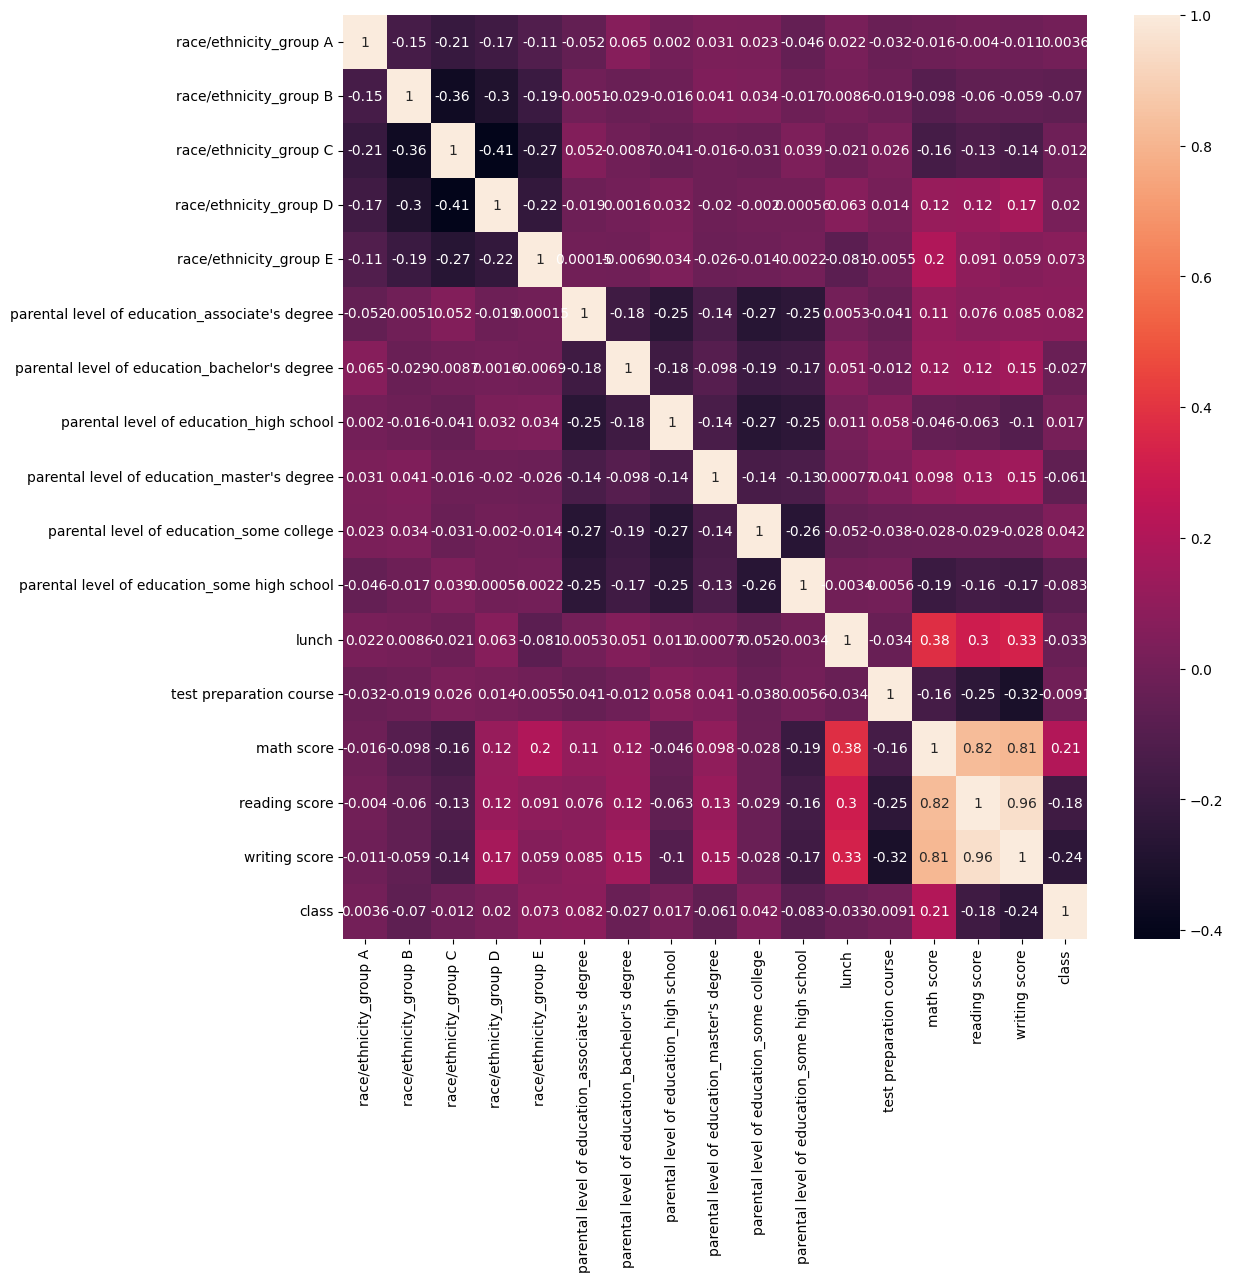

In [15]:
# Т.к признаков получилось много и данные очень неравномерно разделены, то все основные графики
# выглядят неинформативно, только матрица корреляций +- читабельная, да и то особо не дает полезной информации
from matplotlib import pyplot as plt
import seaborn as sns

dataset = X_ov.copy()
dataset['class'] = y_ov
plt.figure(figsize=(12,12))
sns.heatmap(dataset.corr(numeric_only = True), annot=True)
plt.show()

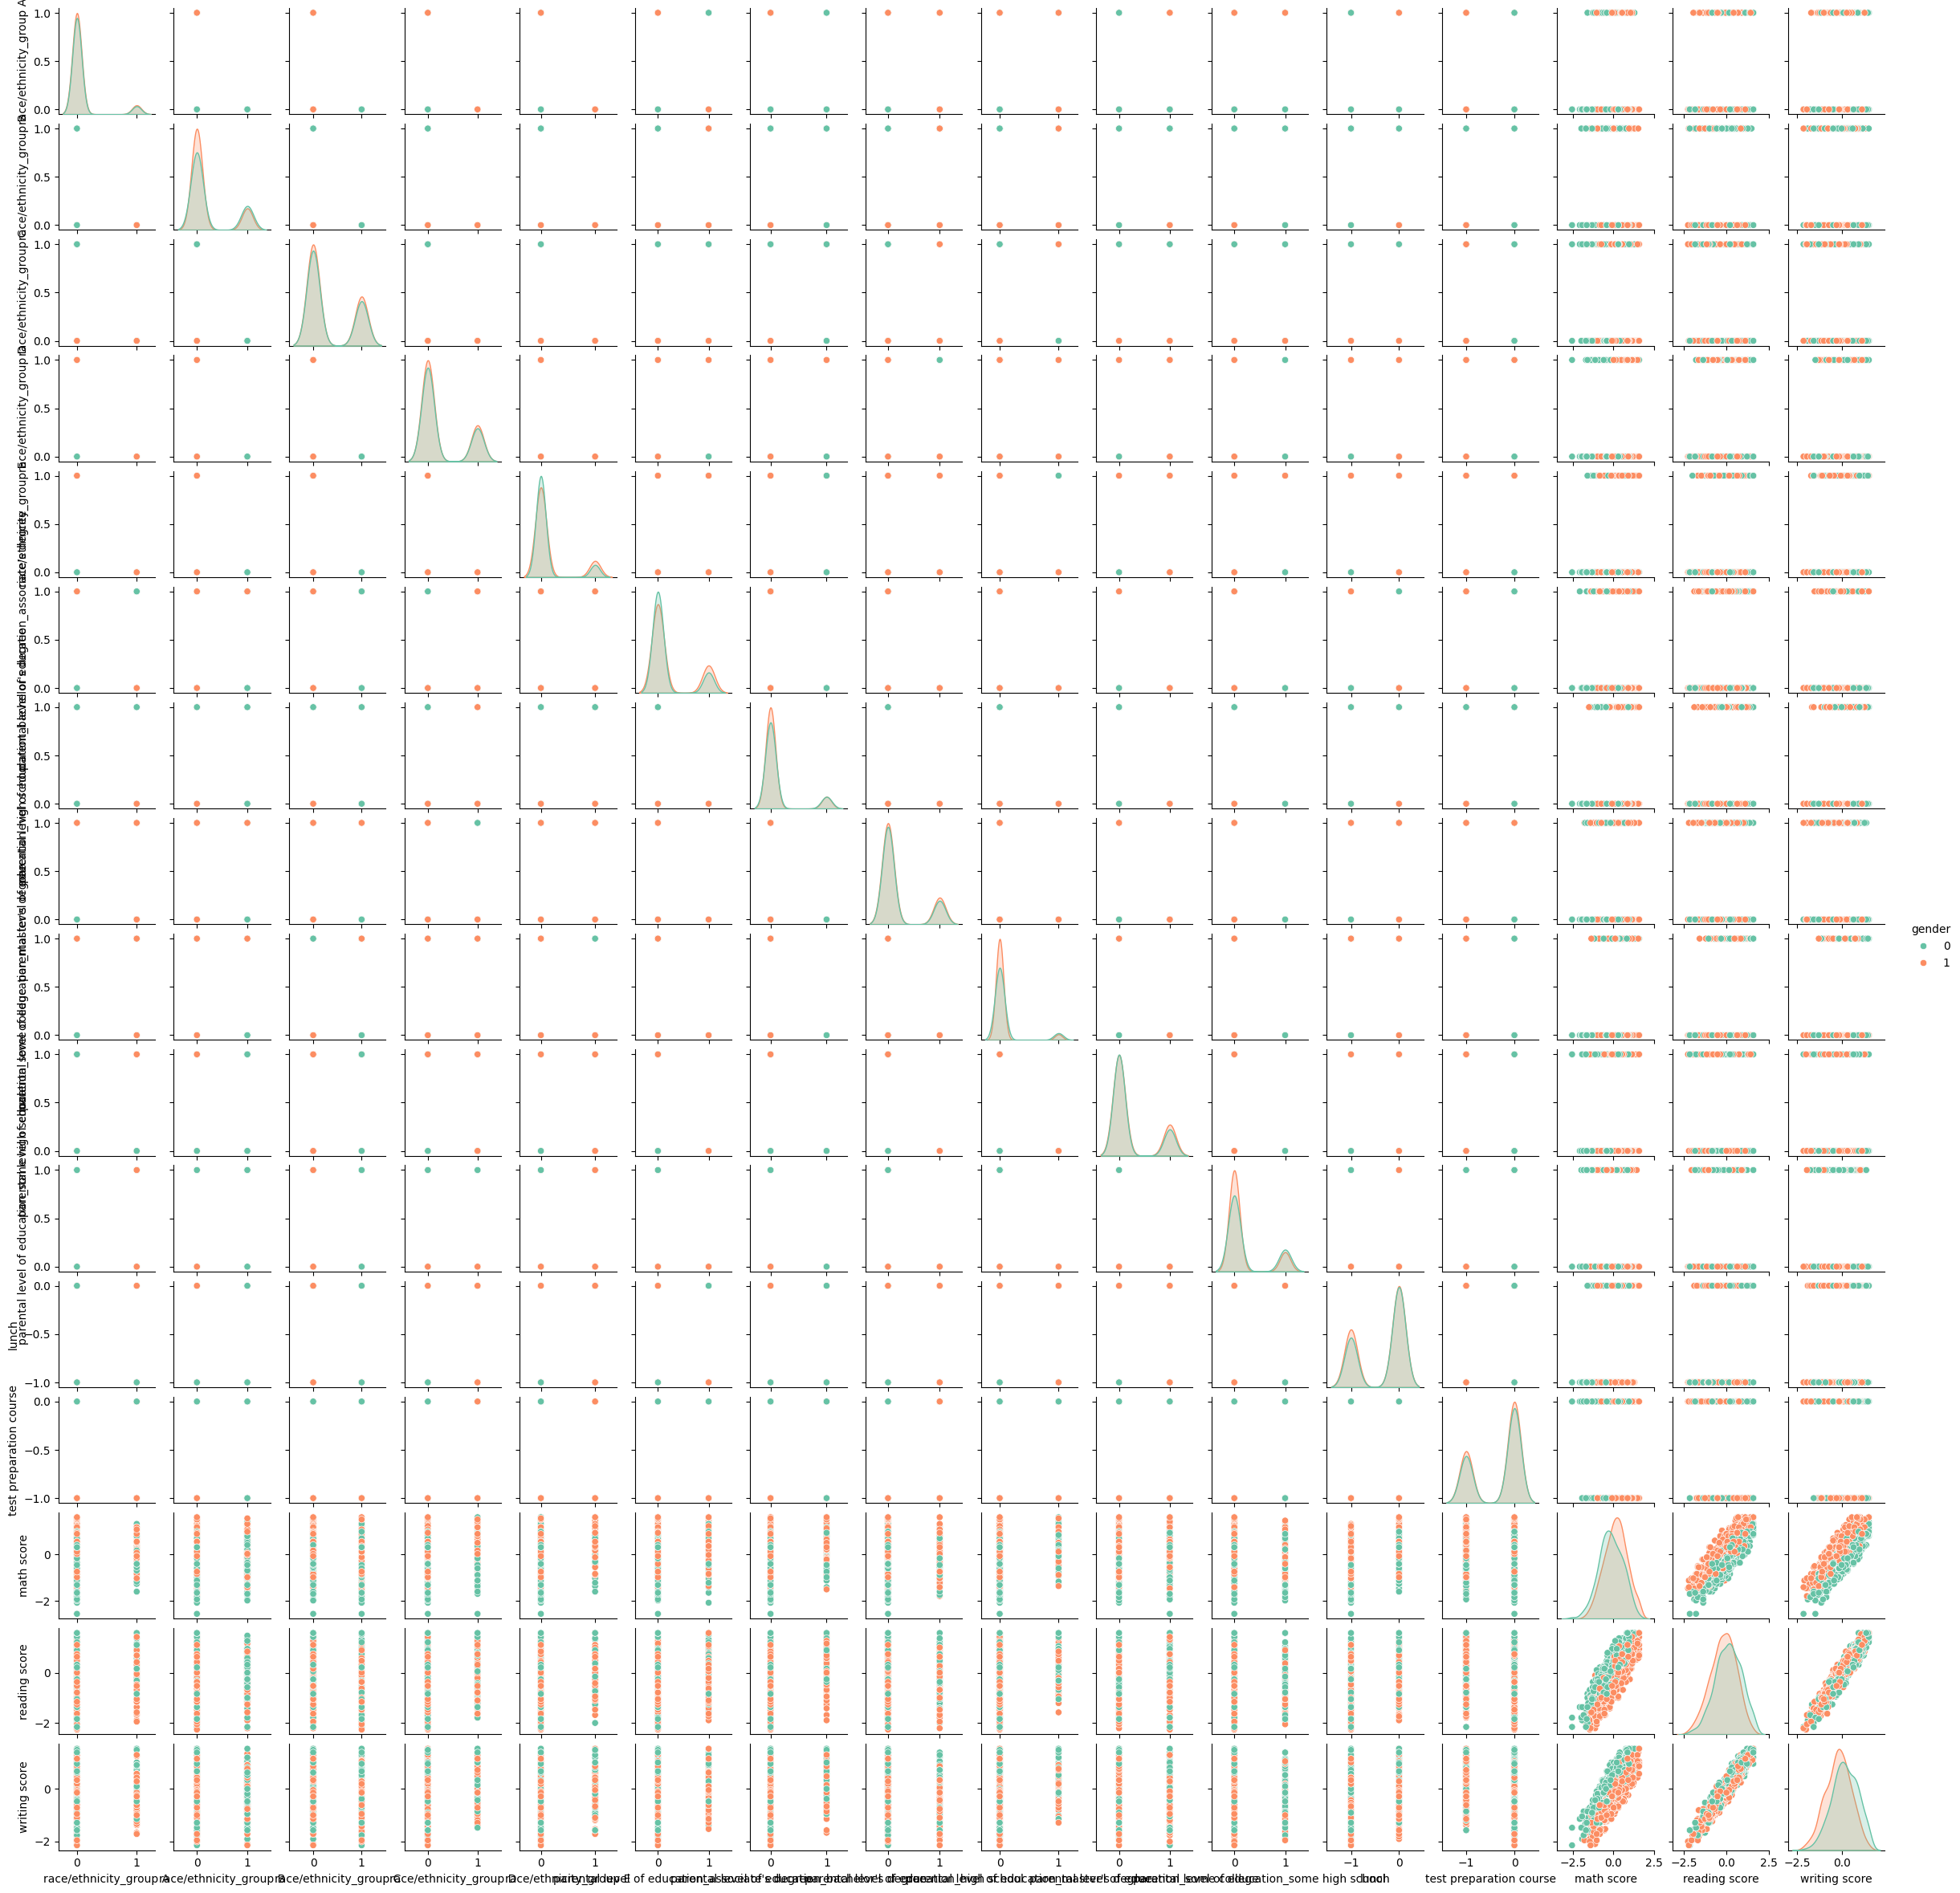

In [16]:
classes_count = len(classes.unique())
concat = pd.concat([X_normalized,classes],axis=1)
sns.set_palette('Set2')
sns.pairplot(concat,hue=label_name,height=1.5)

In [17]:
# Делать разделение на обучающие и тестовые выборки не будем, т.к будем использовать кросс-валидацию
# и т.к мы будем использовать кросс-валидацию, определим параметры по которым будет происходить поиск
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


def LogisticRegression_search_params():
    params = {
        'penalty': ['l2'], #'elasticnet'
        'C': [0.001, 0.01, 0.1, 1.0, 10.0],
        'solver': ['lbfgs', 'liblinear', 'saga'],
        'max_iter': [100, 200, 500]
    }
    return params

def LDA_search_params():
    params = {
        'solver': ['svd', 'lsqr', 'eigen'],
        'shrinkage': [None, 'auto', 0.1, 0.5, 0.9]
    }
    return params

def GaussianNB_search_params():
    params = {
        'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
    }
    return params

def KNeighbors_search_params():
    params = {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    }
    return params

def SVC_search_params():
    params = {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'gamma': ['scale', 'auto']
    }
    return params

def DecisionTree_search_params():
    params = {
        'criterion': ['gini', 'entropy', 'log_loss'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': [None, 'sqrt', 'log2']
    }
    return params

def XGB_search_params():
    params = {
        'max_depth':        [2,4,6,8,10],
        'colsample_bytree': [1, 0.8, 0.6, 0.4],
        'min_child_weight': [1,2,5,7],
        'gamma':            [0,2,5,15],
        'eta':              [0.1,0.3,0.5],
        'lambda':           [0.2,1,2]
    }
    return params

models = []
models.append(('LR', LogisticRegression(),LogisticRegression_search_params()))
models.append(('LDA', LinearDiscriminantAnalysis(),LDA_search_params()))
models.append(('KNN', KNeighborsClassifier(),KNeighbors_search_params()))
models.append(('CART', DecisionTreeClassifier(),DecisionTree_search_params()))
models.append(('NB', GaussianNB(),GaussianNB_search_params()))
models.append(('SVC', SVC(),SVC_search_params()))
models.append(('XGB', XGBClassifier(),XGB_search_params()))

In [18]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold
from cross_val_classification_report import cross_val_classification_report

# для кросс-валидации обучаем найденнуб модель на 9/10 частях данных, валидируем на оставшейся 1/10 части данных,
# так делаем со всеми частями данных во взаимноисключающем множестве(всего 10 раз)
# потом перемешываем данные, и повторяем этот процесс 3 раза
# таким образом мы получим крайне адекватную и даже чрезмерно надежную метрику предсказательной способности модели
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=50)
results = {}

for name,model,params in models:
    print(f"SEARCHING FOR {name} PARAMETERS...")
    # для обучения используем насыщенные данные, для тестирования исходные
    search = RandomizedSearchCV(
        model,
        params,
        n_iter=100,
        cv=5,
        random_state=0,
        n_jobs=6,
    )
    search.fit(X_ov,y_ov)
    best=search.best_estimator_
    report = cross_val_classification_report(
        model=best,
        X=np.array(X_normalized),
        y=np.array(classes),
        cv=cv
    )
    results[name]=(best,report)


SEARCHING FOR LR PARAMETERS...


/home/vlad/Programs/Programs/Git/ML_LAB/venv/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning:

The total space of parameters 45 is smaller than n_iter=100. Running 45 iterations. For exhaustive searches, use GridSearchCV.



SEARCHING FOR LDA PARAMETERS...


/home/vlad/Programs/Programs/Git/ML_LAB/venv/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning:

The total space of parameters 15 is smaller than n_iter=100. Running 15 iterations. For exhaustive searches, use GridSearchCV.

/home/vlad/Programs/Programs/Git/ML_LAB/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning:


25 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/home/vlad/Programs/Programs/Git/ML_LAB/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_

SEARCHING FOR KNN PARAMETERS...


/home/vlad/Programs/Programs/Git/ML_LAB/venv/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning:

The total space of parameters 18 is smaller than n_iter=100. Running 18 iterations. For exhaustive searches, use GridSearchCV.



SEARCHING FOR CART PARAMETERS...
SEARCHING FOR NB PARAMETERS...
SEARCHING FOR SVC PARAMETERS...


/home/vlad/Programs/Programs/Git/ML_LAB/venv/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning:

The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.

/home/vlad/Programs/Programs/Git/ML_LAB/venv/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning:

The total space of parameters 40 is smaller than n_iter=100. Running 40 iterations. For exhaustive searches, use GridSearchCV.



SEARCHING FOR XGB PARAMETERS...


In [19]:
# повторюсь, по причине того что все значения метрик рапорта классификаторов 
# посчитаны исключительно на непересекающихся с тренеровочными, тестирующих множествах,
# при многократном изменении обучающей и тестирующей подвыборки, так
# мы получаем совершенно адеквтную и надежную оценку качества модели, и числам, 
# # которые получаются здесь ниже точно можно доверять,
# и их должно быть достаточно чтоб вырать лучшую модель
for name in results:
    model,report = results[name]
    print("REPORT FOR MODEL",name)
    print(report)

REPORT FOR MODEL LR
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      1449
           1       0.89      0.90      0.89      1551

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000

REPORT FOR MODEL LDA
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1449
           1       0.89      0.89      0.89      1551

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000

REPORT FOR MODEL KNN
              precision    recall  f1-score   support

           0       0.68      0.67      0.67      1449
           1       0.69      0.71      0.70      1551

    accuracy                           0.69      3000
   macro avg       0.69      0.69      0.69      3000
weighted avg

['math score',
 'writing score',
 'reading score',
 'test preparation course',
 'race/ethnicity_group E',
 "parental level of education_associate's degree",
 'lunch',
 'race/ethnicity_group B',
 'race/ethnicity_group D',
 "parental level of education_bachelor's degree",
 'parental level of education_some high school']

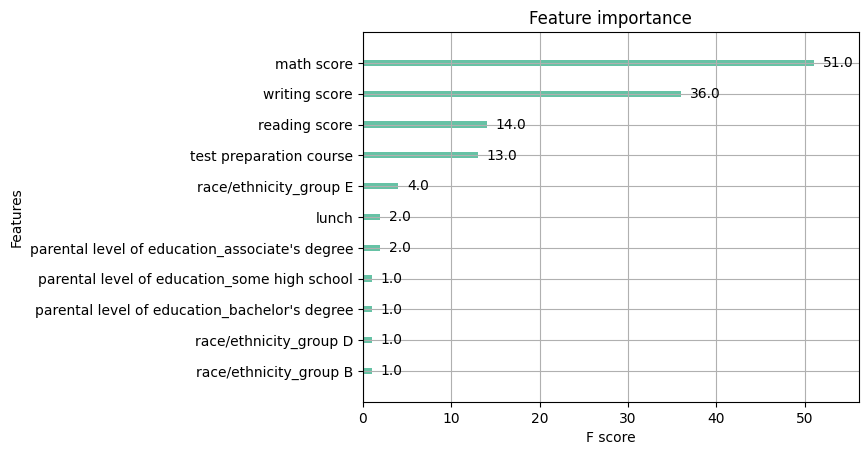

In [20]:
# Выведем важность каждой из фич чтоб понять по каким фичам лучше делат рендер
from xgboost import plot_importance
best_model : XGBClassifier = results["XGB"][0]
booster = best_model.get_booster()

# назначаем имена фичам и достаем их важность из XGB модели
booster.feature_names = X_normalized.columns.tolist()

importance = booster.get_score(importance_type="weight", fmap="")
plot_importance(best_model)
important_features = sorted(importance, key=importance.get, reverse=True)
important_features

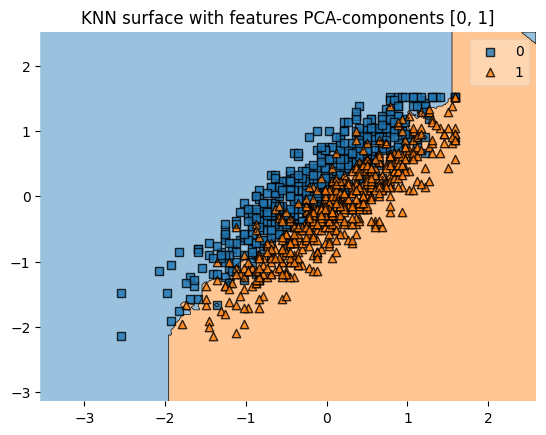

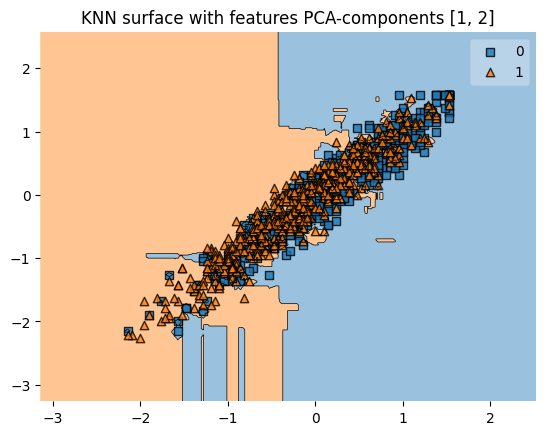

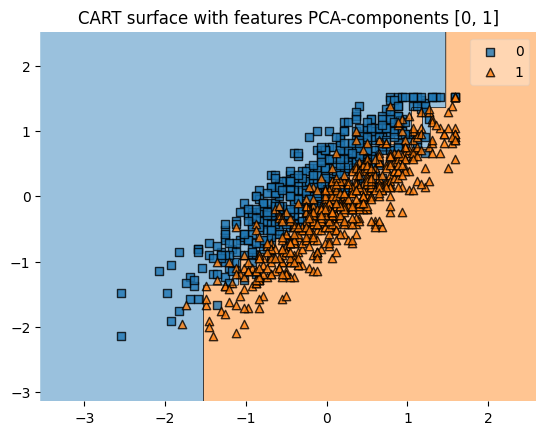

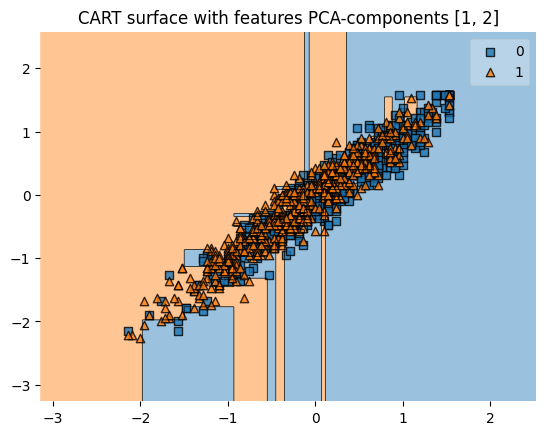

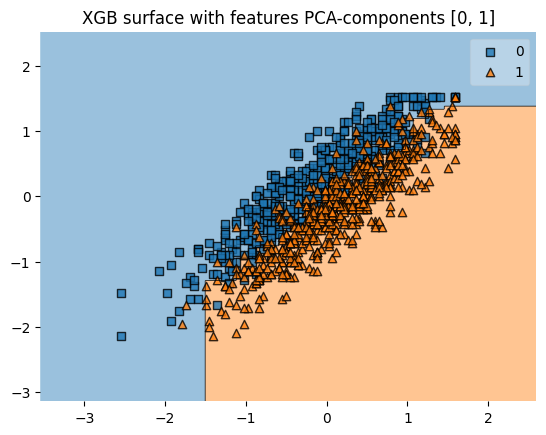

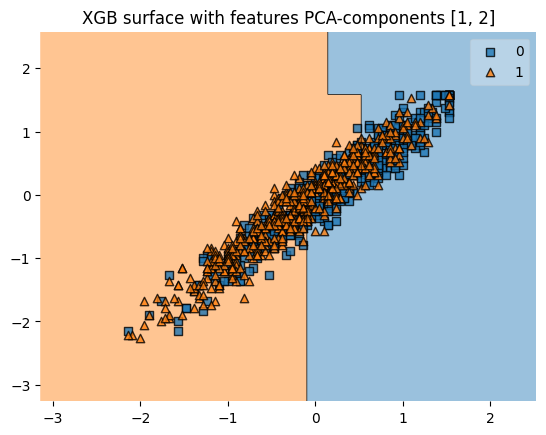

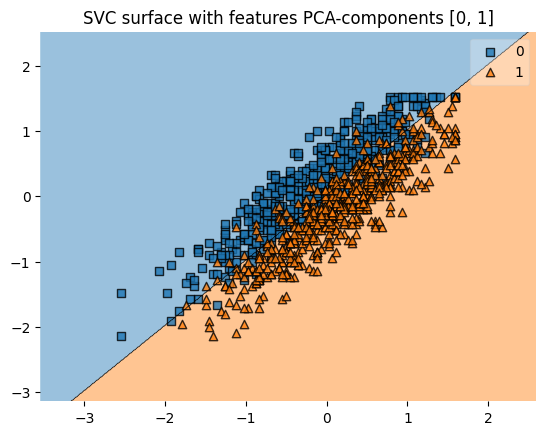

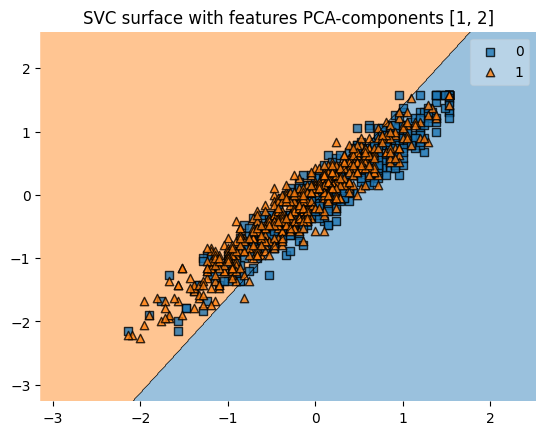

In [32]:
# К сожалению, даже на этих самых важных фичах при попытке нарисовать графики работы классификатора по ним
# мы натыкаемся на проблему высокой сложности данных, так как среза данных по двум измерениям
# не хватает, чтоб отобразить адекватно области распределенния
# классов, и получается некрасивые графики.
# По этой причине, для того чтоб графики были более информативны, мы делаем срез по PCA-компонентам данных, таким образом,
# мы получим более информативный график
from mlxtend.plotting import plot_decision_regions
import copy

X_important = X_normalized[important_features[:3]]

selected_models = ["KNN","CART","XGB","SVC"]

pca = PCA(n_components=4)
X_zip = pca.fit_transform(X_normalized)

X_zip = np.array(X_important)

important_features_pairs = [
	[0, 1],
	[1,	2],
]

for selected_model in selected_models:
	for features_pair in important_features_pairs:
		y_s = classes
		X_2d= X_zip[:,features_pair]
		y_2d = y_s.values
		
		model = copy.deepcopy(results[selected_model][0])
		model.fit(X_2d,y_2d)

		plt.title(f'{selected_model} surface with features PCA-components {features_pair}')
		plot_decision_regions(
				X=X_2d,
				y=y_2d,	
				clf=model)
		plt.show()